In [1]:
import pandas 

In [2]:
import json

# Specify the file path
file_path = '/Users/kiakarbasi/pykt/src/pykt-toolkit/data/assist2009/keyid2idx.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Print the data
print(data)


{'questions': {'54003': 0, '53991': 1, '54071': 2, '54015': 3, '53987': 4, '53781': 5, '54193': 6, '53795': 7, '54130': 8, '54035': 9, '49276': 10, '53966': 11, '54593': 12, '90498': 13, '89863': 14, '89737': 15, '60011': 16, '71776': 17, '90210': 18, '54051': 19, '53317': 20, '53008': 21, '54456': 22, '66825': 23, '66826': 24, '66827': 25, '51186': 26, '66813': 27, '84817': 28, '53609': 29, '53999': 30, '86549': 31, '53786': 32, '49286': 33, '49270': 34, '49290': 35, '49265': 36, '49278': 37, '85714': 38, '84951': 39, '84724': 40, '84938': 41, '84974': 42, '84788': 43, '85826': 44, '86054': 45, '61100': 46, '87777': 47, '86102': 48, '88521': 49, '87045': 50, '54460': 51, '54612': 52, '58775': 53, '60111': 54, '109008': 55, '108966': 56, '108924': 57, '109011': 58, '108957': 59, '87560': 60, '87461': 61, '87597': 62, '87471': 63, '87538': 64, '87590': 65, '87563': 66, '87512': 67, '87517': 68, '87425': 69, '89706': 70, '90237': 71, '90639': 72, '89953': 73, '86200': 74, '86188': 75, '8

In [3]:
import csv

# Get the keys of the questions object in the original order
question_keys = list(data['questions'].keys())

# Get the keys of the concepts object in the original order
concept_keys = list(data['concepts'].keys())

# Specify the file path for the questions CSV file
questions_csv_file_path = 'questions.csv'

# Write the question keys to the CSV file
with open(questions_csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([question_keys])

# Specify the file path for the concepts CSV file
concepts_csv_file_path = 'concepts.csv'

# Write the concept keys to the CSV file
with open(concepts_csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([concept_keys])


In [8]:
question_keys


dict_keys(['54003', '53991', '54071', '54015', '53987', '53781', '54193', '53795', '54130', '54035', '49276', '53966', '54593', '90498', '89863', '89737', '60011', '71776', '90210', '54051', '53317', '53008', '54456', '66825', '66826', '66827', '51186', '66813', '84817', '53609', '53999', '86549', '53786', '49286', '49270', '49290', '49265', '49278', '85714', '84951', '84724', '84938', '84974', '84788', '85826', '86054', '61100', '87777', '86102', '88521', '87045', '54460', '54612', '58775', '60111', '109008', '108966', '108924', '109011', '108957', '87560', '87461', '87597', '87471', '87538', '87590', '87563', '87512', '87517', '87425', '89706', '90237', '90639', '89953', '86200', '86188', '86157', '86160', '54124', '86895', '54298', '66079', '52813', '66545', '97836', '97884', '97788', '97828', '97824', '66187', '53327', '66699', '78930', '78902', '79063', '79056', '78866', '79004', '79072', '84605', '51156', '50990', '51044', '80882', '80714', '80738', '80862', '80902', '80878', '80

In [1]:
df 

NameError: name 'df' is not defined

In [3]:
import pandas as pd
df = pd.read_csv('/Users/kiakarbasi/pykt/src/pykt-toolkit/data/assist2009/train_valid_quelevel.csv', encoding = "ISO-8859-1", dtype=str)

In [5]:
df = pd.read_csv('/Users/kiakarbasi/pykt/src/pykt-toolkit/data/assist2009/skill_builder_data_corrected_collapsed.csv', encoding = "ISO-8859-1", dtype=str)

In [9]:
df['problem_id'].unique().shape

(7836,)

In [2]:
import torch

/Users/kiakarbasi/anaconda3/envs/kiapykt/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch
embs  = torch.load('openai_text-embedding-3-large_3072.pt')
embs_sub = embs[0 : int(embs.shape[0]/2)]

In [4]:
embs_sub = embs[0 : int(embs.shape[0]/2)]

In [5]:
embs.shape[0]/2

6141.0

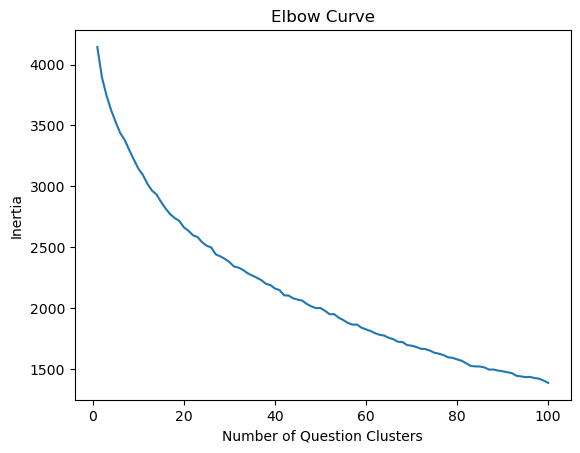

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Find the best number of clusters using the elbow method
inertia = []
max_clusters = 100  # Maximum number of clusters to try
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(embs_sub)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia)
plt.xlabel('Number of Question Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

The best number of clusters is 150
[104  56   5 ...  72  72  72]
pca done


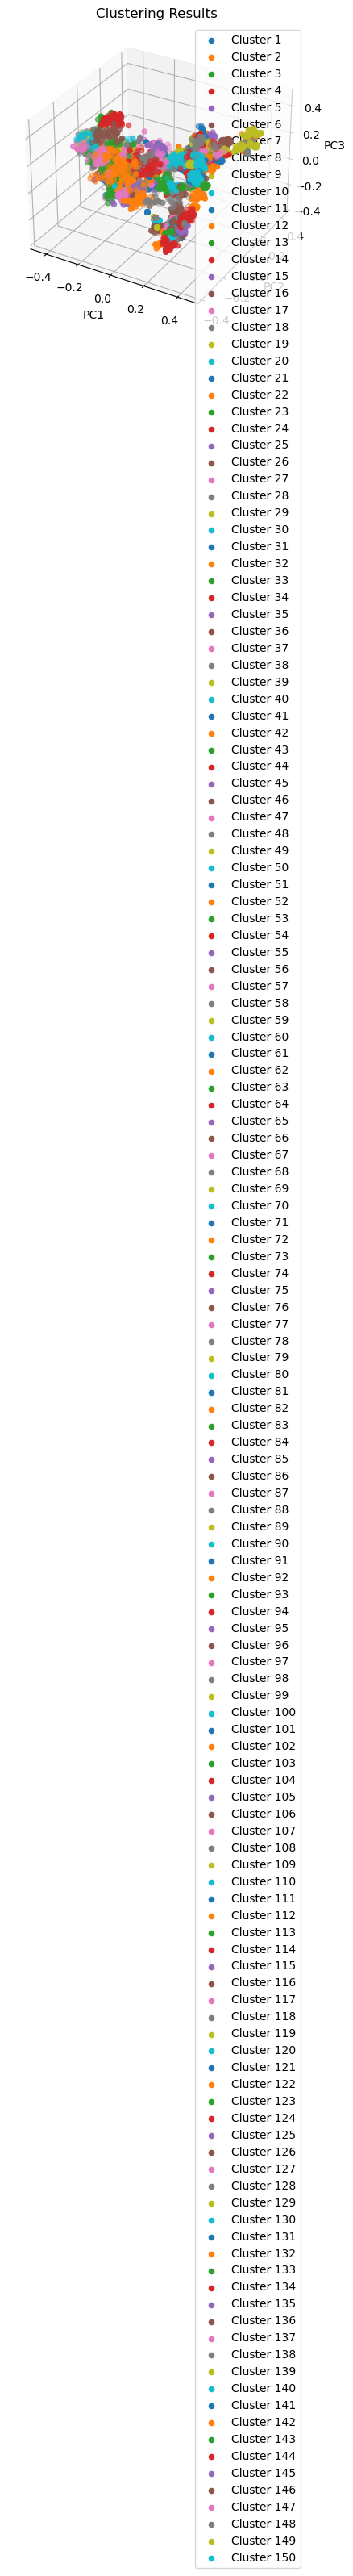

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# # Find the best number of clusters using the elbow method
# inertia = []
# max_clusters = 100  # Maximum number of clusters to try
# for n_clusters in range(1, max_clusters + 1):
#     kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#     kmeans.fit(embs_sub)
#     inertia.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.plot(range(1, max_clusters + 1), inertia)
# plt.xlabel('Number of Question Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Curve')
# plt.show()

# Choose the best number of clusters based on the elbow curve
# best_n_clusters = int(input("Enter the best number of clusters: "))
best_n_clusters = 150
print(f'The best number of clusters is {best_n_clusters}')
# best_n_clusters = 44
# Perform clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(embs_sub)

print(kmeans.labels_)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
embs_sub_pca = pca.fit_transform(embs_sub)
print('pca done')
# Plot the clusters in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(best_n_clusters):
    cluster_points = embs_sub_pca[kmeans.labels_ == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# ax.legend()
plt.title('Clustering Results')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': kmeans.labels_})


In [ ]:
I want to cluster embs_sub's rows into clusters. I want the number of clusters to be hyperparameter and I want it to be found for best clustering. Then I want the clustering plotted on a 3d plot (use PCA) where each cluster has its own color. then I want the mapping from each row number to each cluster saved in a dataframe

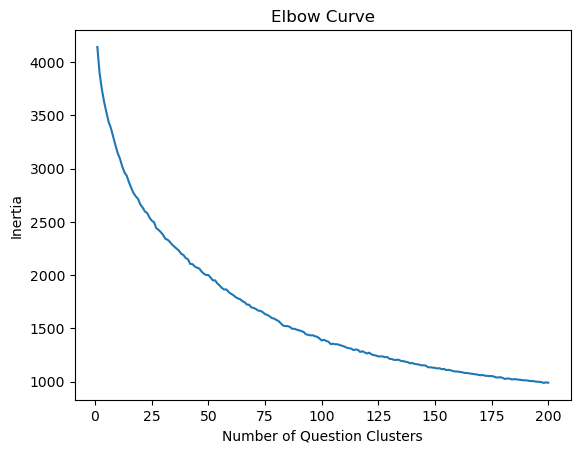

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Find the best number of clusters using the elbow method
inertia = []
max_clusters = 200  # Maximum number of clusters to try
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(embs_sub)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia)
plt.xlabel('Number of Question Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

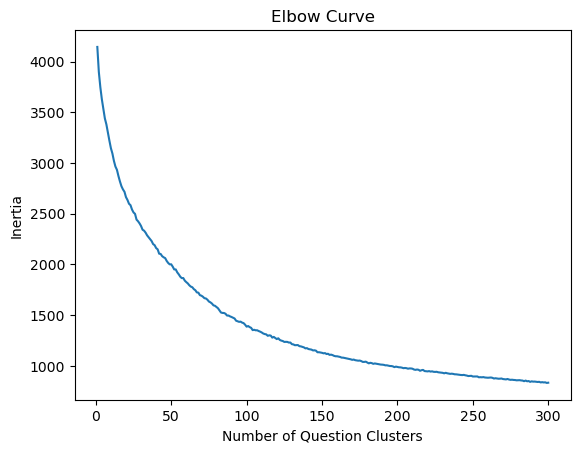

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Find the best number of clusters using the elbow method
inertia = []
max_clusters = 300  # Maximum number of clusters to try
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(embs_sub)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia)
plt.xlabel('Number of Question Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Find the best number of clusters using the Bayesian Information Criterion (BIC)
lowest_bic = float('inf')
best_n_components = None
max_clusters = 200  # Maximum number of clusters to try
for n_components in range(1, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(embs_sub)
    bic = gmm.bic(embs_sub)
    if bic < lowest_bic:
        lowest_bic = bic
        best_n_components = n_components

print(f"The best number of clusters is {best_n_components}")

# Perform clustering with the best number of components
gmm = GaussianMixture(n_components=best_n_components, random_state=0)
gmm.fit(embs_sub)
labels = gmm.predict(embs_sub)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
embs_sub_pca = pca.fit_transform(embs_sub)

# Plot the clusters in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(best_n_components):
    cluster_points = embs_sub_pca[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('Clustering Results')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': labels})


KeyboardInterrupt: 

In [11]:
best_n_components

1

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Find the best number of clusters using the Bayesian Information Criterion (BIC)
lowest_bic = float('inf')
best_n_components = None
max_clusters = 200  # Maximum number of clusters to try
for n_components in range(1, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(embs_sub)
    bic = gmm.bic(embs_sub)
    if bic < lowest_bic:
        lowest_bic = bic
        best_n_components = n_components

print(f"The best number of clusters is {best_n_components}")

# Perform clustering with the best number of components
gmm = GaussianMixture(n_components=best_n_components, random_state=0)
gmm.fit(embs_sub)
labels = gmm.predict(embs_sub)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
embs_sub_pca = pca.fit_transform(embs_sub)

# Plot the clusters in a 2D plot
plt.scatter(embs_sub_pca[:, 0], embs_sub_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': labels})


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Perform clustering with 150 components
gmm = GaussianMixture(n_components=150, random_state=0)
gmm.fit(embs_sub)
labels = gmm.predict(embs_sub)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
embs_sub_pca = pca.fit_transform(embs_sub)

# Plot the clusters in a 2D plot
plt.scatter(embs_sub_pca[:, 0], embs_sub_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': labels})


I want to cluster embs_sub's rows into clusters. I want the number of clusters to be hyperparameter and I want it to be found for best clustering. Then I want the clustering plotted on a 3d plot (use PCA) where each cluster has its own color. then I want the mapping from each row number to each cluster saved in a dataframe